In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [18]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2016, 2017)

dataSetOps.prepare()
dataSetOps.prepare2(5, 30)

df = dataSetOps.df

In [19]:
df['value_nr'] = df['value_is_down']
print(len(df))
print(len(df[df.value_nr]))
df['fclass_1'] = (df['mavg10'] > 0) & (df['mavg20'] > 5) & (df['mavg100'] > 5) & (df['mavg1000'] > 5)
df = df[df['fclass_1']]

prob = len(df[df.value_nr]) / len(df)

print(len(df))
print(len(df[df.value_nr]))

743248
200697
21135
8524


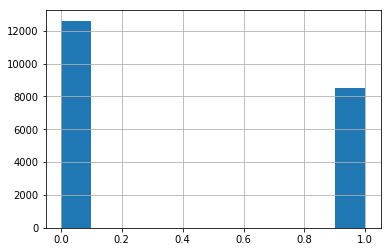

In [20]:
df.value_nr.astype(int).hist()

In [21]:
X = df[['value_d', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value_nr']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 5))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae]
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 5)

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=8, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/5
16908/16908 [==============================] - 1s 64us/step - loss: 0.2403 - mean_absolute_error: 0.4809
Epoch 2/5
16908/16908 [==============================] - 1s 47us/step - loss: 0.2393 - mean_absolute_error: 0.4785
Epoch 3/5
16908/16908 [==============================] - 1s 47us/step - loss: 0.2392 - mean_absolute_error: 0.4777
Epoch 4/5
16908/16908 [==============================] - 1s 47us/step - loss: 0.2391 - mean_absolute_error: 0.4776
Epoch 5/5
16908/16908 [==============================] - 1s 47us/step - loss: 0.2390 - mean_absolute_error: 0.4777


In [59]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.5))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.5 risk:  1
optimistic_accuracy => risk:  0.48 min pass point:  0.45259663


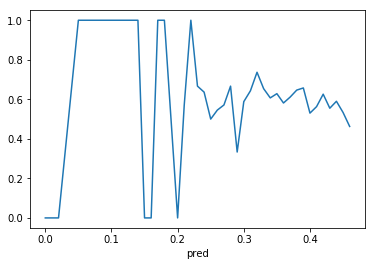

In [60]:
risk_hist_df.risk.plot()

In [43]:
prob

0.4033120416370949

In [48]:
cm

array([[2464,   16],
       [1729,   18]])

In [49]:
risk_hist_df

,ok,not_ok,risk
pred,,,
3.15,1,0,0.000000
2.21,1,0,0.000000
1.66,1,0,0.000000
1.63,1,0,0.000000
1.05,0,1,1.000000
0.93,0,1,1.000000
0.77,0,1,1.000000
0.67,1,1,0.500000
0.60,1,1,0.500000
